# 2013 French Referendum - Analysis

The analysis will start at the national level, then move to the departmental level and finally will investigate interesting and noteworthy cases for the commune.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load referendum data
referendumData = pd.read_csv('./DATA/Referendum.csv', delimiter=';')
rdColNames = referendumData.columns

In [3]:
rdColNames = referendumData.columns
referendumDataNorm = referendumData[rdColNames[-4:]].div(referendumData[rdColNames[-5]],axis=0)
[referendumDataNorm.rename(columns = { rdColNames[i] : 'Norm '+ rdColNames[i] }, inplace=True) for i in np.arange(-4,0)]
referendumData[referendumDataNorm.columns] = referendumDataNorm
del referendumDataNorm

In [4]:
referendumData["Margin"] = referendumData["Norm Choix A"] - referendumData["Norm Choix B"]

In [5]:
#Later Rhône is split into 69D and 69M. Modify the Original Data to match geodata before creating new dataframes
referendumData["Code du département"].replace(['69'], '69D',inplace=True)
mask = (referendumData["Libellé de la commune"]=="Lyon")
referendumData['Code du département'][mask] = '69M'

<ipython-input-5-e44b3ead9760>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  referendumData['Code du département'][mask] = '69M'


I want to first check to see that there are no null values to be aware of. Overall, from first inspection, the data already seem quite clean.

In [6]:
#Check for null values, thank you for the clean data!!
pd.isnull(referendumData).any(axis=0)
#np.sum(referendumData["Inscrits"]-(referendumData["Abstentions"]+referendumData["Blancs et nuls"]+referendumData["Choix A"]+referendumData["Choix B"]))

Code du département       False
Libellé du département    False
Code de la commune        False
Libellé de la commune     False
Inscrits                  False
Abstentions               False
Blancs et nuls            False
Choix A                   False
Choix B                   False
Norm Abstentions          False
Norm Blancs et nuls       False
Norm Choix A              False
Norm Choix B              False
Margin                    False
dtype: bool

# Brainstorming Initial Questions to understand 'Referendum.csv'

My initial impression of this dataset is that it is a single event, so with the data alone I wouldn't feel confident to predict future referenda, for example. However, there is a significiant amount of geographic information that can be linked to how populations from a department/commune may be linked to the referendum results. In this notebook, I plan to just explore only these data.

- What was the overall result of the referendum?
- Of those registered to vote, was the voter turnout for the referendum?
- What were the results for each department?
- Which commune have the most notable (extreme) referendum results?
    - Which communes have the biggest victories for Choix A or Choix B?
    - Which communes are the most divided (e.g. count(Choix A) ~= count(Choix B))?
    - Which communes are least confident in both candidates (e.g. greatest abstentions, blancs et nuls)?
- Is there a geographical trend to the results? Is it possible to plot/visulaize the results over a map of France?

### What was the overall result of the referendum?


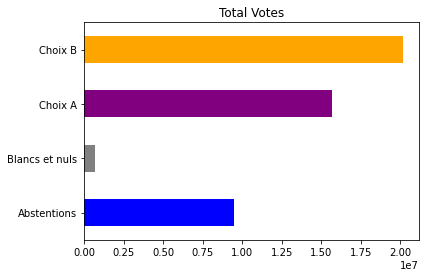

In [7]:
referendumDataSum = referendumData.sum()
plot = referendumDataSum[-9:-5].plot.barh(title="Total Votes", color=['Blue','Grey','Purple','Orange'])


### Of those registered to vote, was the voter turnout for the referendum?


In [8]:
#Voter Turnout by country (normalized)
turnoutNormalized = np.sum(referendumDataSum[-9:-5])/referendumDataSum[-10]
print(turnoutNormalized)
#plot = referendumDataSum[-5].plot.barh(title="Total Votes")
referendumDataSum[-5]

1.0


5677.782143080258

### Results by Departement

In [9]:
colInterest = ['Inscrits','Abstentions', 'Blancs et nuls', "Choix A", "Choix B"]
#Group data by Department Code and sum over all rows for the columns of interest.
statsByDepartement = referendumData.groupby("Code du département")[colInterest].agg('sum')
statsByDepartementNorm  = statsByDepartement[colInterest[1:]].div(statsByDepartement[colInterest[0]],axis=0) 
[statsByDepartementNorm.rename(columns = { colName : 'Norm '+ colName }, inplace=True) for colName in colInterest]
statsByDepartement[statsByDepartementNorm.columns] = statsByDepartementNorm
del statsByDepartementNorm

statsByDepartement["Margin"] = statsByDepartement["Norm Choix A"] - statsByDepartement["Norm Choix B"]

statsByDepartement.loc[statsByDepartement.index == '69M']
statsByDepartement

,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B,Norm Abstentions,Norm Blancs et nuls,Norm Choix A,Norm Choix B,Margin
Code du département,,,,,,,,,,
1,393808,65996,6453,116379,204980,0.167584,0.016386,0.295522,0.520507,-0.224985
10,203590,37939,3466,54743,107442,0.186350,0.017024,0.268888,0.527737,-0.258849
11,264288,43641,4299,102595,113753,0.165127,0.016266,0.388194,0.430413,-0.042219
12,218347,32095,4539,83404,98309,0.146991,0.020788,0.381979,0.450242,-0.068263
13,1314766,257432,16711,428682,611941,0.195801,0.012710,0.326052,0.465437,-0.139385
...,...,...,...,...,...,...,...,...,...,...
ZP,186642,94542,2281,36056,53763,0.506542,0.012221,0.193183,0.288054,-0.094871
ZS,4923,2193,99,1456,1175,0.445460,0.020110,0.295755,0.238676,0.057079
ZW,8940,2494,39,3359,3048,0.278971,0.004362,0.375727,0.340940,0.034787


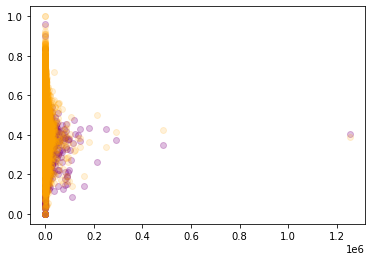

In [10]:
fig, ax = plt.subplots()
choixA = ax.scatter(referendumData['Inscrits'],referendumData['Norm Choix A'],
                    color='purple', alpha=0.25, label="Choix A")
choixB = ax.scatter(referendumData['Inscrits'],referendumData['Norm Choix B'],
                    color='orange',alpha=0.15, label="Choix B")



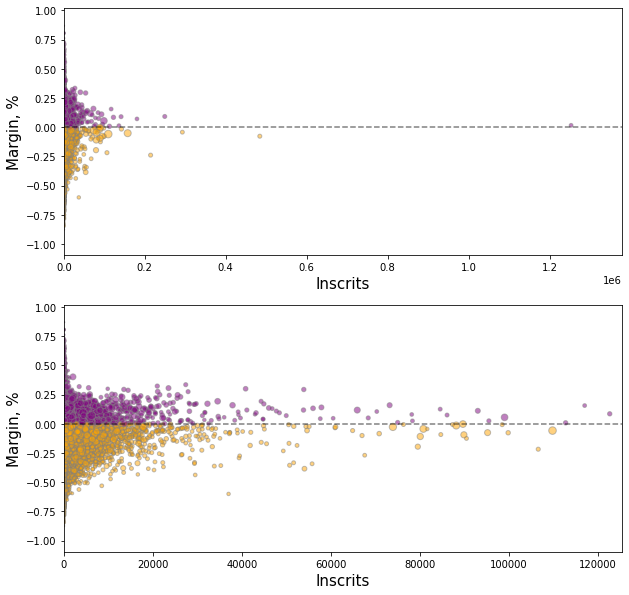

In [11]:
fig, axs = plt.subplots(2,1)
fig.set_size_inches(10,10)
colorlist = ['orange','purple']
winnerBool = (referendumData["Norm Choix A"] > referendumData["Norm Choix B"]).to_numpy(int)
color = [ colorlist[i] for i in winnerBool ]

xlims = [[0,1.1*referendumData['Inscrits'].max()],[0,0.1*referendumData['Inscrits'].max()]]

for i,ax in enumerate(axs):
    ax.scatter(referendumData['Inscrits'],referendumData['Margin'], 
           color=color,
           edgecolors="gray",
           s=75*referendumData["Norm Abstentions"].to_numpy(float),
           alpha=0.5)
    ax.plot([0.0,1.1*referendumData['Inscrits'].max()],[0.0,0.0], color='black', linestyle='dashed', alpha=0.5)
    
    xlim = ax.set_xlim(xlims[i])

    xlabel = ax.set_xlabel('Inscrits',fontsize=15)
    ylabel = ax.set_ylabel('Margin, %',fontsize=15)

In [12]:
referendumData["Inscrits"].loc[referendumData["Margin"] > 0.0].describe()

count    5.785000e+03
mean     2.143485e+03
std      1.829824e+04
min      9.000000e+00
25%      1.370000e+02
50%      3.090000e+02
75%      8.390000e+02
max      1.253322e+06
Name: Inscrits, dtype: float64

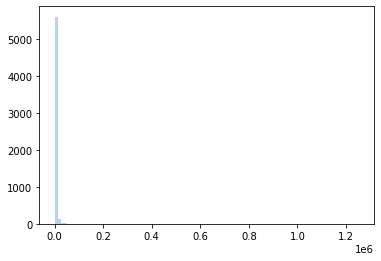

In [13]:
fig, ax = plt.subplots()
#hist, binEdge = np.histogram(referendumData["Inscrits"].loc[referendumData["Margin"] < 0.0], bins=500, density=False)

#binCenter = (binEdge[:-1] + binEdge[1:])/2.0

    
#coeff, var_matrix = scipy.optimize.curve_fit(gauss, binCenter, hist, p0=[1.,0.,1.])
#histFit = gauss(binCenter,*coeff)

_hist = ax.hist(referendumData["Inscrits"].loc[referendumData["Margin"] > 0.0], bins=100,
            label="test",alpha=0.3)
#ax.plot(binCenter,histFit,color=colors[col])


In [14]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

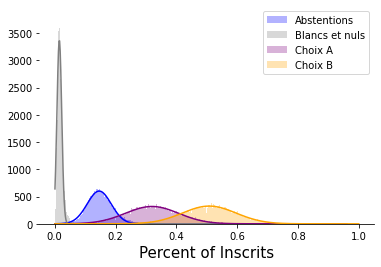

In [15]:
fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

colors = ["blue","gray","purple","orange","black"]
for col in np.arange(-5,-1):
    
    hist, binEdge = np.histogram(referendumData[referendumData.columns[col]], bins=500, density=False)
                            
                            #, bins=100, label=str(referendumData.columns[i])[5:],alpha=0.3)
    binCenter = (binEdge[:-1] + binEdge[1:])/2.0
    
    coeff, var_matrix = scipy.optimize.curve_fit(gauss, binCenter, hist, p0=[1.,0.,1.])
    histFit = gauss(binCenter,*coeff)
    
    ax.hist(referendumData[referendumData.columns[col]], bins=500,
            label=str(referendumData.columns[col])[5:],
            color=colors[col],alpha=0.3)
    ax.plot(binCenter,histFit,color=colors[col])
    
    

xlabel = ax.set_xlabel('Percent of Inscrits',fontsize=15)
ax.legend();

(30843,)

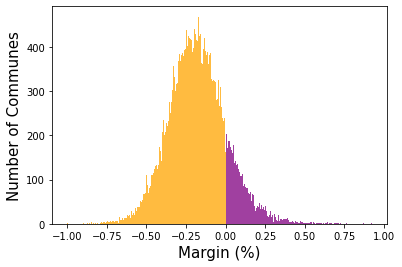

In [16]:
fig, ax = plt.subplots()


_hist = ax.hist(referendumData.loc[referendumData["Margin"]>0, "Margin"], bins=200,
            label=str(referendumData.columns[col])[5:],
            color='purple',alpha=0.75)
_hist = ax.hist(referendumData.loc[referendumData["Margin"]<0, "Margin"], bins=200,
            label=str(referendumData.columns[col])[5:],
            color='orange',alpha=0.75)

xlabel = ax.set_xlabel('Margin (%)',fontsize=15)
ylabel = ax.set_ylabel('Number of Communes', fontsize=15)

np.shape(referendumData.loc[referendumData["Margin"]<0, "Margin"])

In [17]:
#Setting up environment for geopandas: 
#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib import cm
#from mpl_toolkits.axes_grid1 import make_axes_locatabl

#French Map from https://www.data.gouv.fr/en/datasets/contours-des-departements-francais-issus-d-openstreetmap/
grid_fp = r"./DATA/departements-20180101-shp/departements-20180101.shp"
commune_fp = r"./DATA/communes-20210101-shp/communes-20210101.shp"

grid = gpd.read_file(grid_fp)
commune = gpd.read_file(commune_fp)

gridCRS = grid.crs
communeCRS = commune.crs

grid = grid.to_crs(epsg=3857)
commune = commune.to_crs(epsg=3857)


In [18]:
grid.sort_values(by=["code_insee"]).tail(10)
#grid.loc[grid['code_insee']=='69']
grid["code_insee"].unique()

referendumData.loc[referendumData['Code du département']=='69M']
grid.loc[grid['code_insee']=='69M']
grid.rename(columns = { 'code_insee' : 'Code du département' }, inplace=True)
grid['Code du département']=grid['Code du département'].str.strip('0')
#grid['Code du département'].unique()

In [19]:
# Join grid and statsByDepartement by Departement Code
grid.rename(columns = { 'code_insee' : 'Code du département' }, inplace=True)
grid['Code du département']=grid['Code du département'].str.strip('0')

merged = grid.merge(statsByDepartement, on='Code du département')
merged['Code du département'].unique()
merged['Vote Margin'] = merged['Choix A']-merged['Choix B']

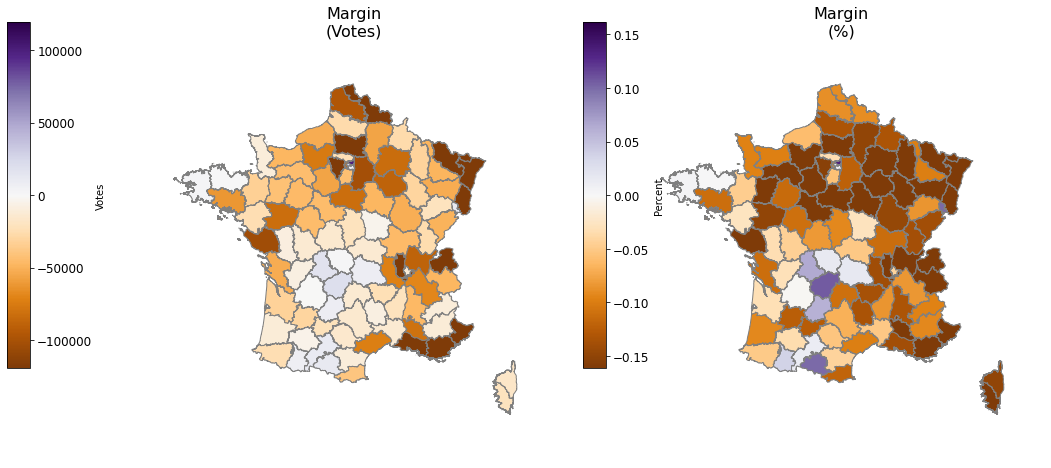

In [20]:
import matplotlib.colors as colors

fig,axs = plt.subplots(1,2,figsize = (16, 8))

columnToPlot = ['Vote Margin','Margin']
titles = ['Margin\n(Votes)','Margin\n(%)']
labels = ['Votes','Percent']

for i,ax in enumerate(axs):
    
    vmin = merged[columnToPlot[i]].min(); vmax = merged[columnToPlot[i]].max();
    merged.plot(ax=ax, cmap = 'PuOr', column = columnToPlot[i], edgecolor='gray',legend=False,
                vmin =-1.2*np.max([vmin,vmax]),
                vmax = 1.2*np.max([vmin,vmax])
            )
    ax.set_title(titles[i], size=16);
    xlim = ax.set_xlim([-680631.44,1255712.16])
    ylim = ax.set_ylim([4838410.95,6837050.34])

    fig.patch.set_visible(False);
    ax.axis('off');
    
    cax = fig.add_axes([i*0.5, 0.3, 0.02, 0.6])
    sm = plt.cm.ScalarMappable(cmap='PuOr', 
                               norm=plt.Normalize(vmin=-1.2*np.max([vmin,vmax]),vmax=1.2*np.max([vmin,vmax])))
    sm._A = [];
    cbr = fig.colorbar(sm, cax=cax,label=labels[i]);
    cbr.ax.tick_params(labelsize=12);


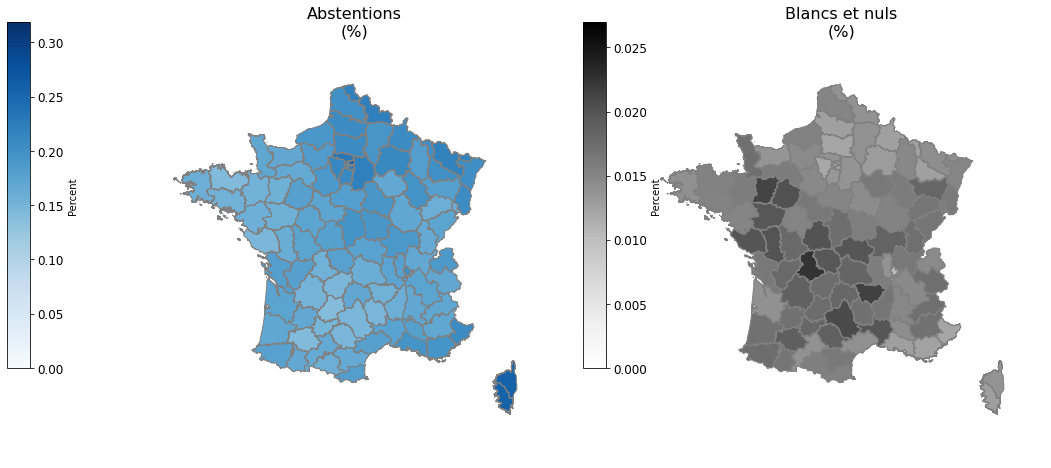

In [21]:
fig,axs = plt.subplots(1,2,figsize = (16, 8))

columnToPlot = ['Norm Abstentions','Norm Blancs et nuls']
titles = ['Abstentions\n(%)','Blancs et nuls\n(%)']
labels = ['Percent','Percent']
colors = ['Blues','Greys']

for i,ax in enumerate(axs):
    
    vmin = merged[columnToPlot[i]].min(); vmax = merged[columnToPlot[i]].max();
    merged.plot(ax=ax, cmap=colors[i], column = columnToPlot[i], edgecolor='gray',legend=False,
                vmin =0.0,
                vmax = 1.2*np.max([vmin,vmax])
            )
    ax.set_title(titles[i], size=16);
    xlim = ax.set_xlim([-680631.44,1255712.16])
    ylim = ax.set_ylim([4838410.95,6837050.34])

    fig.patch.set_visible(False);
    ax.axis('off');
    
    cax = fig.add_axes([i*0.5, 0.3, 0.02, 0.6])
    sm = plt.cm.ScalarMappable(cmap=colors[i], 
                               norm=plt.Normalize(vmin=0.0,vmax=1.2*np.max([vmin,vmax])))
    sm._A = [];
    cbr = fig.colorbar(sm, cax=cax,label=labels[i]);
    cbr.ax.tick_params(labelsize=12);

### Save Original Data for Future Analysis

In [22]:
referendumData.to_pickle('./DATA/referendumData_toLoad.pkl')
statsByDepartement.to_pickle('./DATA/statsByDepartement_toLoad.pkl')
merged.to_pickle('./DATA/referendumAndGIS.pkl')